In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NĂM 3/icml_face_data.csv")

#1. Visualized

In [ ]:
df.shape

(35887, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [ ]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
df.tail()

,emotion,pixels
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...


In [ ]:
df['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [ ]:
count0= len(df[df['emotion'] == 0])
count1= len(df[df['emotion'] == 1])
count2= len(df[df['emotion'] == 2])
count3= len(df[df['emotion'] == 3])
count4= len(df[df['emotion'] == 4])
count5= len(df[df['emotion'] == 5])
count6= len(df[df['emotion'] == 6])
print('number of Angry images(0): ',count0)
print('number of Disgust images(1): ',count1)
print('number of Fear images(2): ',count2)
print('number of Happy images(3): ',count3)
print('number of Sad images(4): ',count4)
print('number of Suprised images(5): ',count5)
print('number of Natural images(6): ',count6)

number of Angry images(0):  4953
number of Disgust images(1):  547
number of Fear images(2):  5121
number of Happy images(3):  8989
number of Sad images(4):  6077
number of Suprised images(5):  4002
number of Natural images(6):  6198


<ipython-input-9-29a244525043>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion', y='Count', data=emotion_counts, palette='viridis')


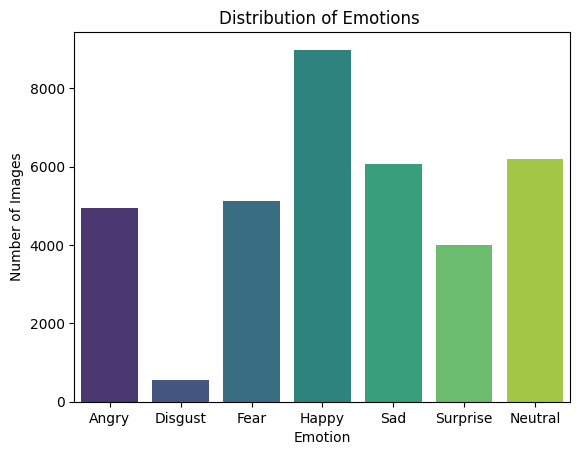

In [ ]:
emotion_counts = pd.DataFrame({
    'Emotion': ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
    'Count': [count0, count1, count2, count3, count4, count5, count6]
})
sns.barplot(x='Emotion', y='Count', data=emotion_counts, palette='viridis')

plt.title('Distribution of Emotions ')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
emotion_label_to_text = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'        }

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=10, figsize=(20, 5))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:20]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title(emotion_label_to_text[label])

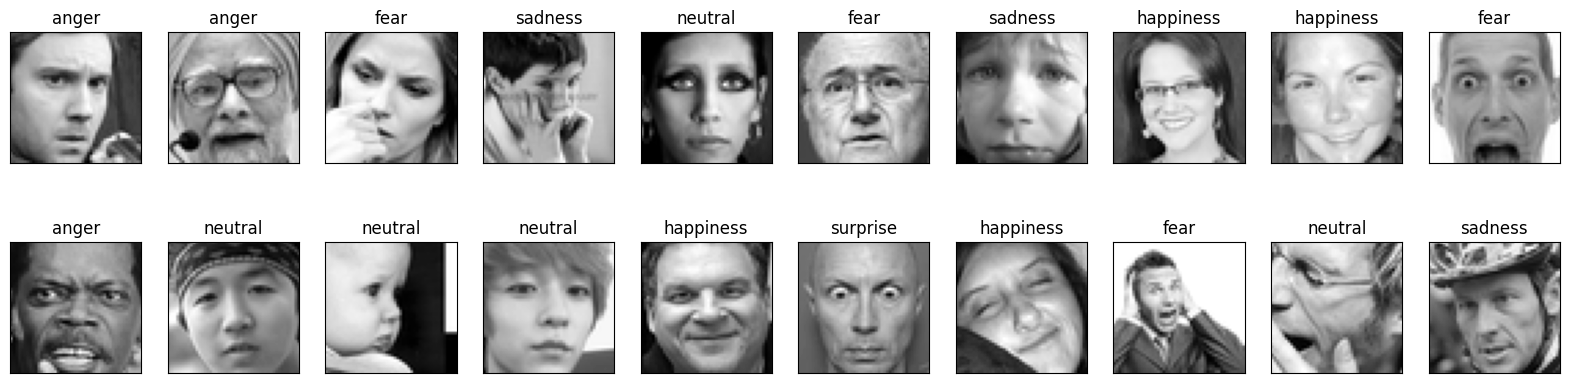

In [ ]:

images, labels = parse_data(df)

show_img(images, labels)

#2. Principle Component Analysis

In [ ]:
X_flatten = images.reshape(images.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_flatten, labels,shuffle = True, test_size=0.2, random_state=42)

pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X_flatten)

##Q1: Can you visualize the data projected onto two principal components? (2 points)

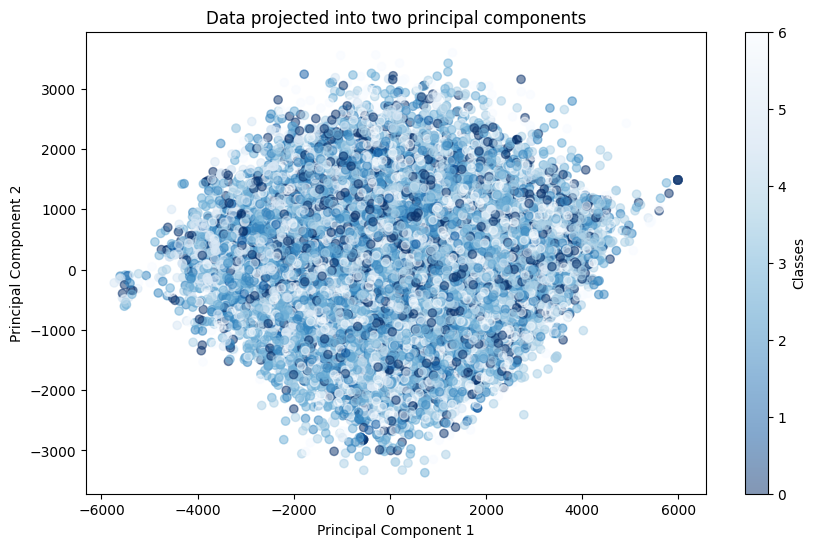

In [ ]:
# Vẽ biểu đồ scatter plot với các thành phần chính
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Blues_r', alpha=0.5)
plt.colorbar(label='Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data projected into two principal components')
plt.show()

##Q2: How to determine the optimal number of principal components using pca.explained_variance_? Explain your selection process. (2 points)



*   Biểu đồ Scree Plot: để xem tỷ lệ phương sai giải thích tích lũy của từng thành phần chính.
*   Xác định ngưỡng: xem xét biểu đồ để xác định số lượng thành phần chính nào đủ để giải thích một lượng phương sai nhất định của dữ liệu gốc. Bài này em chọn ngưỡng 95% để đảm bảo giữ lại đủ lượng thông tin quan trọng từ dữ liệu ban đầu.

*   Quá trình lựa chọn số lượng thành phần chính tối ưu dựa trên ngưỡng phương sai giải thích tích lũy là một phương pháp phổ biến và đơn giản để giảm chiều dữ liệu trong PCA, đồng thời đảm bảo giữ lại lượng thông tin quan trọng của dữ liệu gốc. Quá trình này giúp cải thiện hiệu suất và giảm chi phí tính toán khi áp dụng các mô hình học máy sau này.


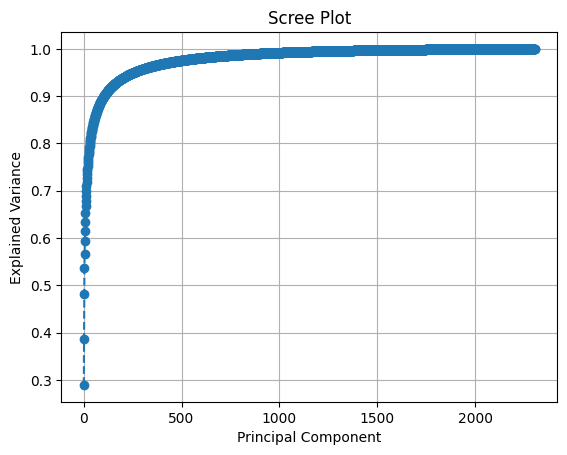

Cumulative explained variance ratio: [0.2892651  0.387289   0.48154432 ... 0.99999913 0.99999958 1.        ]
Optimal number of components: 255


In [ ]:
pca = PCA()
pca.fit(X_flatten)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

print("Cumulative explained variance ratio:",cumulative_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Optimal number of components:", n_components)


#3. Image Classification

##With original data

In [ ]:
pipe_ori = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search1 = GridSearchCV(estimator=pipe_ori, param_grid=param_grid_knn, cv=2, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search1.fit(X_train, y_train)

y_pred_ori = grid_search1.best_estimator_.predict(X_test)

print("Best parameters found: ", grid_search1.best_params_)
print("Best cross-validation score: ", grid_search1.best_score_)
print("Test set classification report:\n", classification_report(y_test, y_pred_ori))
print("Test set score: ", grid_search1.best_estimator_.score(X_test, y_test))


Fitting 2 folds for each of 24 candidates, totalling 48 fits
Best parameters found:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best cross-validation score:  0.3606533303030255
Test set classification report:
               precision    recall  f1-score   support

           0       0.41      0.26      0.32       985
           1       0.44      0.48      0.46       102
           2       0.45      0.32      0.37      1043
           3       0.45      0.55      0.50      1765
           4       0.39      0.30      0.34      1210
           5       0.54      0.56      0.55       795
           6       0.33      0.46      0.38      1278

    accuracy                           0.42      7178
   macro avg       0.43      0.42      0.42      7178
weighted avg       0.42      0.42      0.41      7178

Test set score:  0.4186402897743104


##With PCA data

In [ ]:
pipe_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=255)),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_pca= GridSearchCV(estimator=pipe_pca, param_grid=param_grid_knn, cv=2, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_pca.fit(X_train, y_train)

y_pred_pca = grid_search_pca.best_estimator_.predict(X_test)

print("Best parameters found: ", grid_search_pca.best_params_)
print("Best cross-validation score: ", grid_search_pca.best_score_)
print("Test set classification report:\n", classification_report(y_test, y_pred_pca))
print("Test set score: ", grid_search_pca.best_estimator_.score(X_test, y_test))

Fitting 2 folds for each of 24 candidates, totalling 48 fits
Best parameters found:  {'knn__metric': 'minkowski', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best cross-validation score:  0.35591614229576496
Test set classification report:
               precision    recall  f1-score   support

           0       0.43      0.25      0.31       985
           1       0.44      0.45      0.44       102
           2       0.42      0.32      0.36      1043
           3       0.44      0.55      0.49      1765
           4       0.37      0.31      0.34      1210
           5       0.59      0.55      0.57       795
           6       0.32      0.45      0.38      1278

    accuracy                           0.41      7178
   macro avg       0.43      0.41      0.41      7178
weighted avg       0.42      0.41      0.41      7178

Test set score:  0.41473948174979103


#4. Evaluating Classification Performance

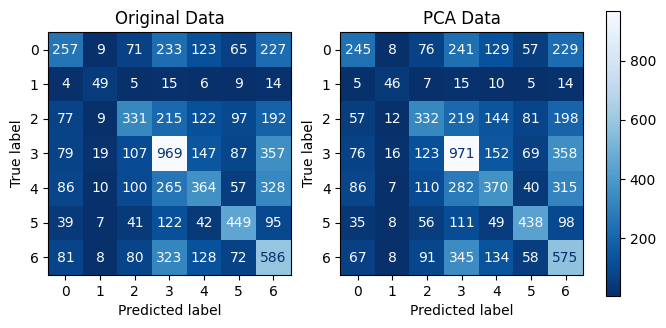

In [ ]:
cm_ori = confusion_matrix(y_test, y_pred_ori)
cm_pca = confusion_matrix(y_test, y_pred_pca)

plt.figure()
# Ma trận nhầm lẫn cho mô hình 1
plt.subplot(1, 2, 1)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_ori)
disp_1.plot(ax=plt.gca(), cmap='Blues_r', colorbar=False)
plt.title('Original Data')

# Ma trận nhầm lẫn cho mô hình 2
plt.subplot(1, 2, 2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_pca)
disp_2.plot(ax=plt.gca(), cmap='Blues_r', colorbar=False)
plt.title('PCA Data')

# Hiển thị cả hai ma trận nhầm lẫn
plt.tight_layout()
plt.colorbar(disp_1.im_, ax=plt.gcf().get_axes(), fraction=0.025, pad=0.04)
plt.show()

-MÔ HÌNH VỚI DỮ LIỆU GỐC:
  + Cảm xúc 5 (Precision: 0.54, Recall: 0.56, F1-score: 0.55): Được nhận dạng tốt nhất với F1-score cao nhất. Điều này cho thấy mô hình phân biệt cảm xúc này một cách tương đối chính xác và nhất quán.
  + Cảm xúc 0 (Precision: 0.41, Recall: 0.26, F1-score: 0.32): Được nhận dạng tệ nhất với F1-score thấp nhất, cho thấy mô hình khó khăn trong việc phân loại đúng cảm xúc này.
  + Cảm xúc 3 (Precision: 0.45, Recall: 0.55, F1-score: 0.50): Có recall cao nhất, cho thấy mô hình có khả năng nhận dạng được nhiều mẫu thuộc cảm xúc này nhưng cũng có khả năng tạo ra nhiều mẫu dương tính giả.
  + Cảm xúc 2 và 4: Có F1-score thấp hơn trung bình, cho thấy việc nhận dạng không ổn định hoặc không chính xác so với các cảm xúc khác.

-MÔ HÌNH VỚI DỮ LIỆU SAU KHI GIẢM CHIỀU (PCA)
  + Cảm xúc 5 (Precision: 0.59, Recall: 0.55, F1-score: 0.57): là cảm xúc được nhận dạng tốt nhất với F1-score cao nhất, vượt trội hơn so với Model 1.
  + Cảm xúc 0 (Precision: 0.43, Recall: 0.25, F1-score: 0.31): Vẫn là cảm xúc được nhận dạng tệ nhất với F1-score thấp nhất, tương tự như trong Model 1.
  + Cảm xúc 3 (Precision: 0.44, Recall: 0.55, F1-score: 0.49): Có recall cao nhất, cho thấy khả năng nhận dạng cảm xúc này của mô hình trên dữ liệu PCA tương đối giống với Model 1.
  + Cảm xúc 2 và 4: Cũng có F1-score thấp, giống như trong Model 1, cho thấy sự khó khăn trong việc nhận dạng các cảm xúc này trong cả hai mô hình.

-NHẬN XÉT CHUNG:

  + Cảm xúc được nhận dạng tốt nhất:Cả hai mô hình đều nhận dạng cảm xúc 5 tốt nhất, với F1-score cao nhất và các chỉ số precision và recall đều cao.
  
  + Cảm xúc được nhận dạng tệ nhất: Cả hai mô hình đều gặp khó khăn với cảm xúc 0, với F1-score thấp nhất. Điều này có thể do sự phức tạp trong đặc điểm của cảm xúc này hoặc dữ liệu không đủ thông tin để phân biệt chính xác.

  + Cả hai mô hình đều có hiệu suất không quá cao (khoảng 41-42% accuracy), điều này có thể cho thấy bài toán phân loại biểu cảm mặt người là khá khó khăn với KNN hoặc dữ liệu có thể có độ phức tạp cao.

  + Model 1 có hiệu suất hơi tốt hơn Model 2, cho thấy rằng trong trường hợp này, việc giảm chiều không mang lại nhiều lợi ích và dữ liệu gốc vẫn hoạt động tốt với mô hình KNN.

  + Mặc dù PCA giúp giảm chiều dữ liệu, hiệu suất của Model 2 không tăng đáng kể so với Model 1. Điều này cho thấy rằng dữ liệu gốc có thể đã chứa đủ thông tin để KNN hoạt động tốt mà không cần giảm chiều.